# project prediksi umur abalone menggunakan kondisi pengukuran fisik

## Latar Belakang Permasalahan

Abalon adalah siput laut yang hidup di perairan pantai yang dingin di seluruh dunia.Memprediksi usia abalon dari pengukuran fisik dapat ditentukan dengan memotong cangkang melalui kerucut, mewarnainya, dan menghitung jumlah cincin melalui mikroskop namun hal tersebut memerlukan waktu yang cukup lama. 


## Objek Permasalahan

Analisa abalon dari segi pengukuran fisik

## Rumusan Masalah

+ Bagaimana cara menentukan umur abalon?
+ Bagaimana model supervised dapat mengatasi masalah ini?
+ Mempelajari hubungan antara kumpulan variabel dependent dan variabel independent(target).

## Tujuan
 memberi informasi untuk melakukan perbandingan  pemodelan  faktor-faktor  yang  memengaruhi umur abalon dengan pengukuran fisik dan dapat perkiraan usia Abalone tanpa harus memotong cangkangnya.

## keterangan dataset
- Sex 			: Male, Female, and I (infant)
- Length 		    : Panjang cangkang dalam milimeter
- Diameter 		: Diameter dalam milimeter
- Height 			: Tinggi termasuk daging dalam cangkang dalam milimeter
- Whole weight 	: Berat keseluruhan abalone dalam gram
- Shucked weight	: Berat daging abalone gram
- Viscera weight 	: Berat usus abalone setelah dikeringkan gram
- Shell weight 	: Berat cangkang setelah dikeringkan gram
- Rings 			: Jumlah rings yang jika ditambahkan 1.5 akan menunjukkan umur abalon 


In [154]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [155]:
df = pd.read_csv('abalone.csv')
df['Age'] = df['Rings']+1.5 #Jumlah rings yang jika ditambahkan 1.5 akan menunjukkan umur abalon
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


membuat kolom baru berisikan umur dari abalon pada kolom age 

In [156]:
df.shape

(4177, 10)

In [157]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [158]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


+ Tidak terdapat missing value
+ Berdasarkan summary statistic pada data kolom height(Tinggi termasuk daging dalam cangkang dalam milimeter)  memiliki minimum 0 sehingga sangat tidak memungkinkan tinggi abalon= 0, maka dari itu kita perlu menghapus height=0 karena kemungkinan height tidak dihitung dalam sample tersebut


In [159]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,7.5


In [160]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 10)

disini saya menghapus 2 row pada dataset sehingga jumlah dataset berkurang

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

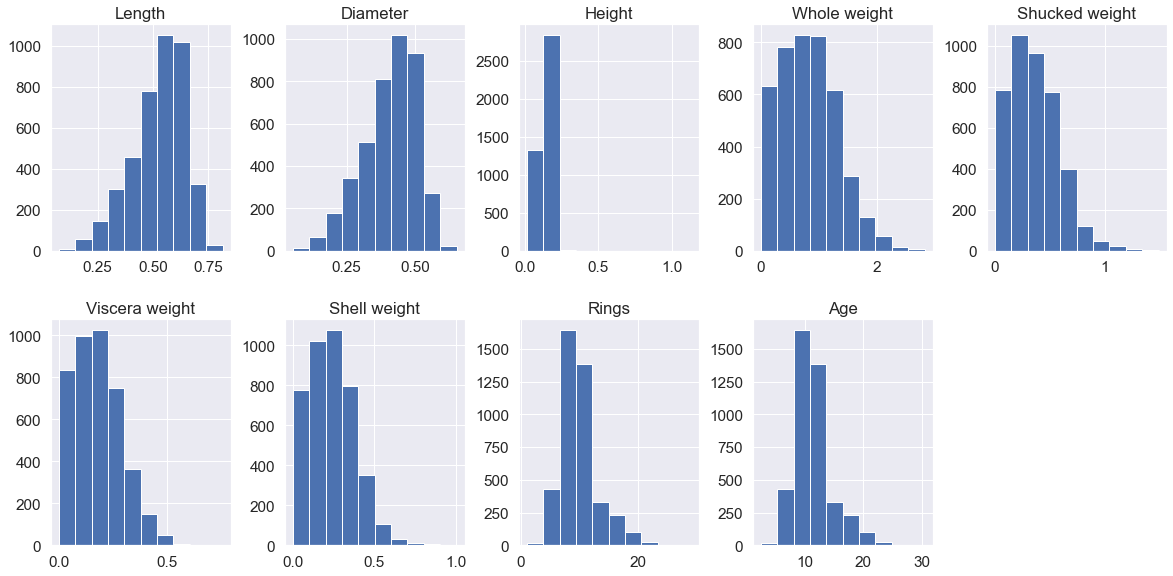

In [161]:
df.hist(figsize = (20,15), layout = (3,5))

In [162]:
df.skew().sort_values(ascending = False)

Height            3.166364
Rings             1.113754
Age               1.113754
Shucked weight    0.718735
Shell weight      0.621081
Viscera weight    0.591455
Whole weight      0.530549
Diameter         -0.610182
Length           -0.640993
dtype: float64

berdasarkan histogram distribusi data cukup menyebar namum condong terlalu tinggi sehingga perlu dilakukan normalisasi

rata rata skew mendekati 0 untuk data yang terdistribusi normal, untuk skew height tertinggi 3,166 , kemungkinan adanya outlier tinggi maka kita perlu memriksanya sebelum membentuk model

Untuk data yang terdistribusi normal, skewness harus sekitar 0. Fungsi skewtest dapat digunakan untuk menentukan apakah nilai skewness cukup dekat dengan 0, secara statistik.

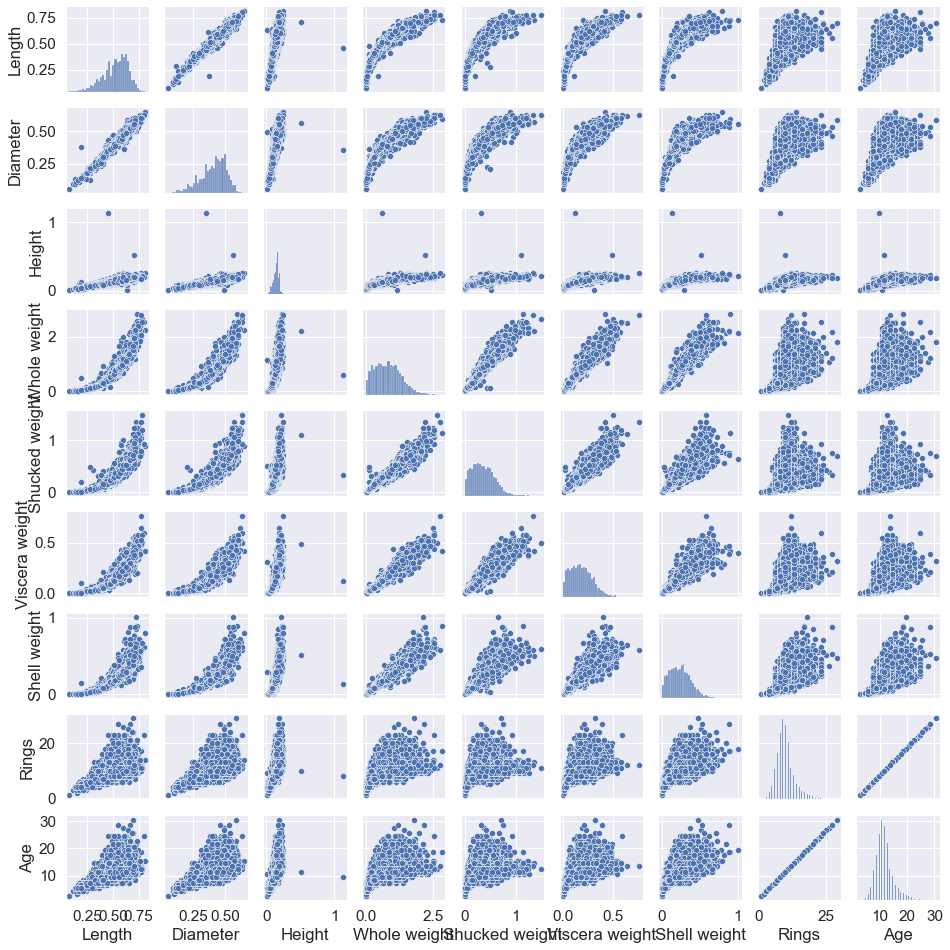

In [163]:
sns.pairplot(df, height=1.5)

length berkorelasi linier dengan diameter sementara non-linear dengan height, whole weight, shucked weight, viscera weight dan  shell weight

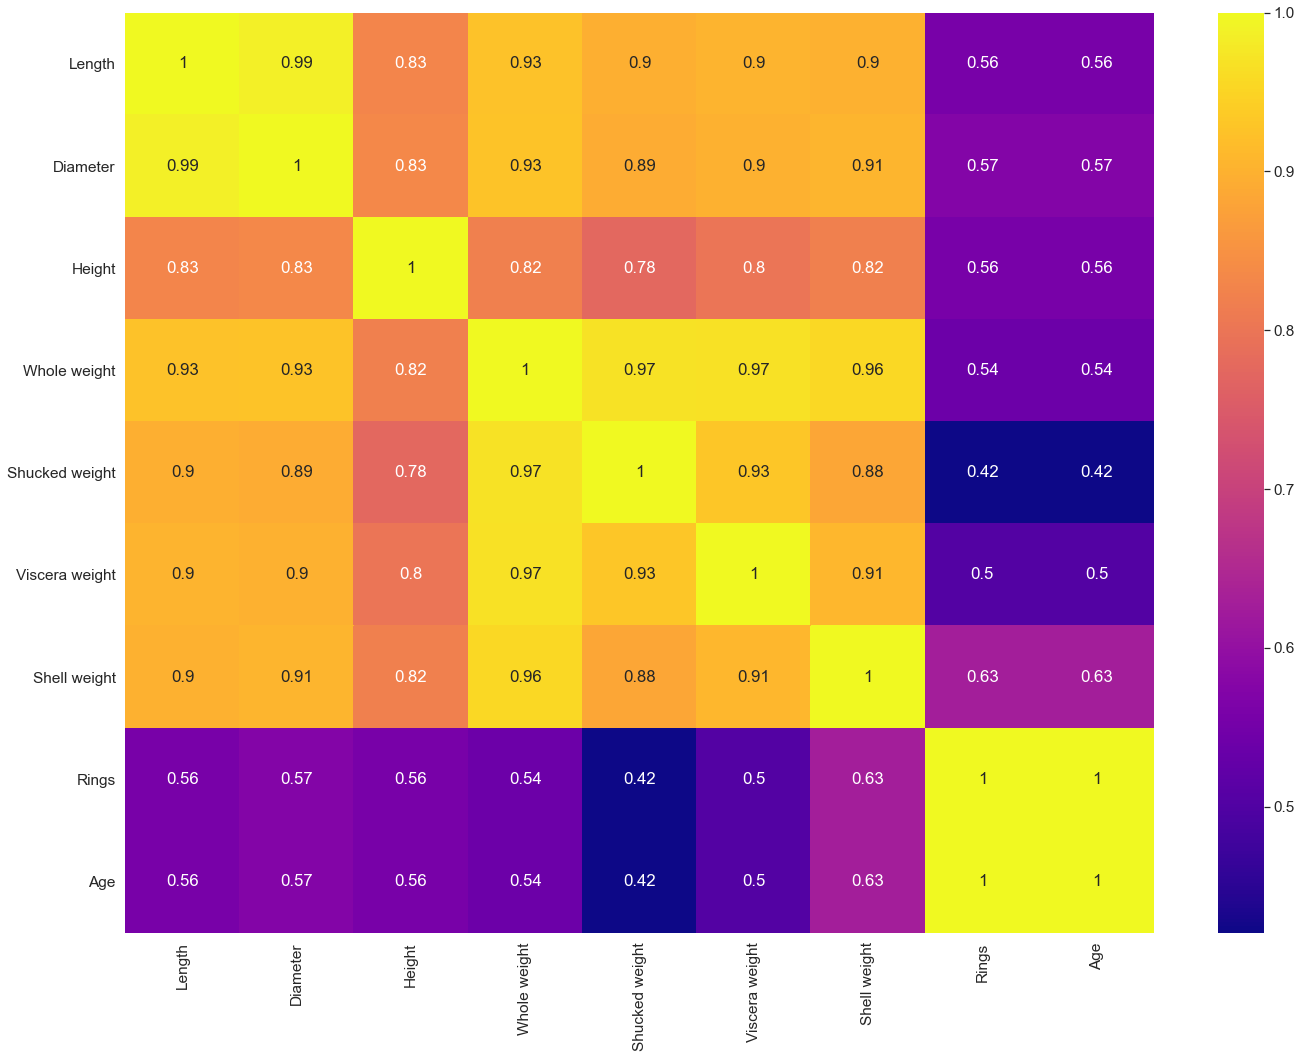

In [164]:
korelasi = df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
sns.heatmap(korelasi, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

Adanya korelasi yang tinggi antara Length dan Diameter, Korelasi tinggi antara shucked weight dan viscera weight sebesar 0.93 ,shucked weight dan Whole weight sebesar  0.97,viscera weight dan  Whole weight sebesar  0.97,  Shell weight dan  Whole weight sebesar 096
Koefisien korelasi yang tinggi antar fitur dapat mengakibatkan multikolinieritas

# Outlier

In [165]:
# Mencari Data Yang Masuk Outlier

label = ["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Age"]
outlier = df.drop(df.index)
for i in label:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier = outlier.append(df[(df[i]<lower_limit) | (df[i]>upper_limit)])

outlier

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
148,I,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5,6.5
149,I,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4,5.5
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,2.5
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3,4.5
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3,4.5
...,...,...,...,...,...,...,...,...,...,...
3929,F,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.4250,16,17.5
3930,F,0.670,0.535,0.185,1.5970,0.6275,0.3500,0.4700,21,22.5
3931,I,0.550,0.440,0.165,0.8605,0.3120,0.1690,0.3000,17,18.5
3944,M,0.550,0.440,0.160,0.9910,0.3480,0.1680,0.3750,20,21.5


# model 

In [167]:
x = df.drop(['Age','Sex','Rings'], axis = 1)
y = df.Age


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

lr = LinearRegression().fit(x_train,y_train)


y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
coef=lr.coef_
intersep=lr.intercept_

print(lr.score(x_test,y_test))
print('nilai koefisien =',coef)
print('nilai intersep=',intersep)

0.5000498300496357
nilai koefisien = [-0.05359654  1.23684657  0.39780923  4.56963726 -4.49670948 -1.11526613
  1.28124398]
nilai intersep= 11.448502994011976


best fit dari simple linear regression 

- Y= 11.448502994011976 -0.05359654x +1.23684657x + 0.39780923x + 4.56963726x -4.49670948x -1.11526613x + 1.28124398

In [168]:
def predict (query):
    if query >=0:
        predict=sum(coef) * query+ intersep
        return predict
    else:
        print('input predict')
        
        
print(predict(0))        
print(predict(1))
print(predict(2))
print(predict(3))
print(predict(3)-predict(2))
print(predict(2)-predict(1))

11.448502994011976
13.26846788261189
15.088432771211805
16.90839765981172
1.8199648885999142
1.8199648885999142


Berdasarkan model diatas artinya jika variabel independent mendekati nol maka nilai variabel dependent 11.44. Sedangkan jika variabel independent naik satu satuan akan menaikkan nilai variabel dependent sebesar 1.819 dengan score 50% variabel independent dapat menjelaskan variabel dependent,keragaman variabel independent hanya mampu dijelaskan oleh variabel independent dalam model tersebut

In [170]:
print("Train mse : ", mse(y_train, lr.predict(x_train)))
print("Test mse : ", mse(y_test, lr.predict(x_test)))

Train mse :  4.9019691294406345
Test mse :  4.960740458316313


# ------------------------------------------------------------------------------

# kesimpulan

+ Berdasarkan model yang dihasilkan menujukan adanya pengaruh antara umur abalone dengan ciri fisik dengan ketepatan akurasi 50% yang artinya variabel variabel dapat dijelaskan dengan baik pada model, sedangkan error rate pada model dijelaskan oleh variabel peubah lain yang diluar model.

# saran
+ dengan akurasi yang didapat, dapat ditambahkan variabel lain diluar bentuk fisik, seperti faktor cuaca atau habitat hidup untuk meningkatkan akurasi
+ memprediksi umur dapat dilakukan sesuai jenis abalone (M,F,I)
+ prediksi dapat menggunakan metode lainnya agar hasil evaluasi dapat dibandingkan dengan hasil yang lebih baik

#### referensi
https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/